**1. terraform installation**

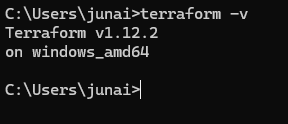

**2. ansible installation**

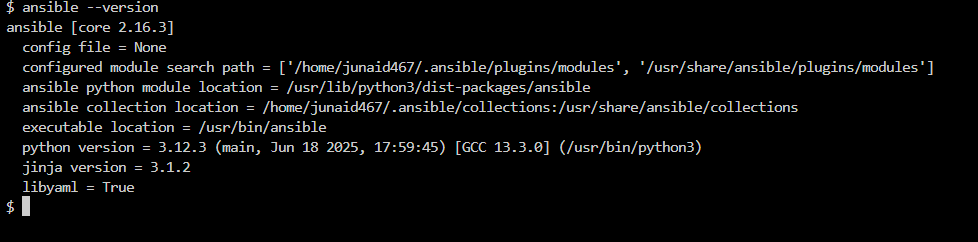

**3. terraform script and commands to run (don't have access to AWS)**

---

```tf
# main.tf

# Configure the AWS provider
# This tells Terraform we want to manage resources in AWS
provider "aws" {
  region = "eu-north-1" # Make sure this matches the region in your AWS console (Stockholm)
}

# Define an AWS EC2 instance resource
resource "aws_instance" "web_server" {
  # ami-0c4636f1c246f903d is an example AMI for Amazon Linux 2 (HVM), SSD Volume Type
  # This AMI is typically available in eu-north-1.
  # You can search for AMIs in your AWS console -> EC2 -> AMIs, and filter for "Amazon Linux 2"
  ami           = "ami-0c4636f1c246f903d"
  instance_type = "t2.micro" # Free tier eligible instance type

  # Associate a security group to allow inbound traffic
  # We'll create this security group next
  vpc_security_group_ids = [aws_security_group.web_sg.id]

  # Add tags to the instance for identification
  tags = {
    Name        = "MyTerraformWebServer"
    Environment = "Dev"
    ManagedBy   = "Terraform"
  }
}

# Define an AWS Security Group resource
# This acts as a firewall for our EC2 instance
resource "aws_security_group" "web_sg" {
  name        = "web-server-security-group"
  description = "Allow HTTP traffic"

  # Ingress (inbound) rules
  ingress {
    from_port   = 80          # Allow HTTP port
    to_port     = 80
    protocol    = "tcp"       # TCP protocol
    cidr_blocks = ["0.0.0.0/0"] # Allow from anywhere (for demonstration)
    description = "Allow inbound HTTP"
  }

  # Egress (outbound) rules - allow all outbound traffic
  egress {
    from_port   = 0
    to_port     = 0
    protocol    = "-1" # -1 means all protocols
    cidr_blocks = ["0.0.0.0/0"]
  }

  tags = {
    Name = "WebSecurityGroup"
  }
}

# Output the public IP address of the EC2 instance
# This will be shown in your terminal after 'terraform apply'
output "instance_public_ip" {
  description = "The public IP address of the EC2 instance"
  value       = aws_instance.web_server.public_ip
}



# commands that I would hit if I were to run this code and had AWS:
# 1. Initialize the Terraform configuration
#    terraform init
# 2. Validate the configuration
#    terraform validate
# 3. Plan the deployment to see what resources will be created
#    terraform plan
# 4. Apply the configuration to create the resources
#    terraform apply
# 5. To destroy the resources when done
#    terraform destroy

```

---

**4. ansible script to run apache on my laptop**

---

```yml
- name: Install and start Apache
  hosts: localhost
  become: yes
  tasks:
    - name: Update apt cache
      apt:
        update_cache: yes
    - name: Install Apache
      apt:
        name: apache2
        state: present
    - name: Start Apache service
      service:
        name: apache2
        state: started
        enabled: yes


```

---

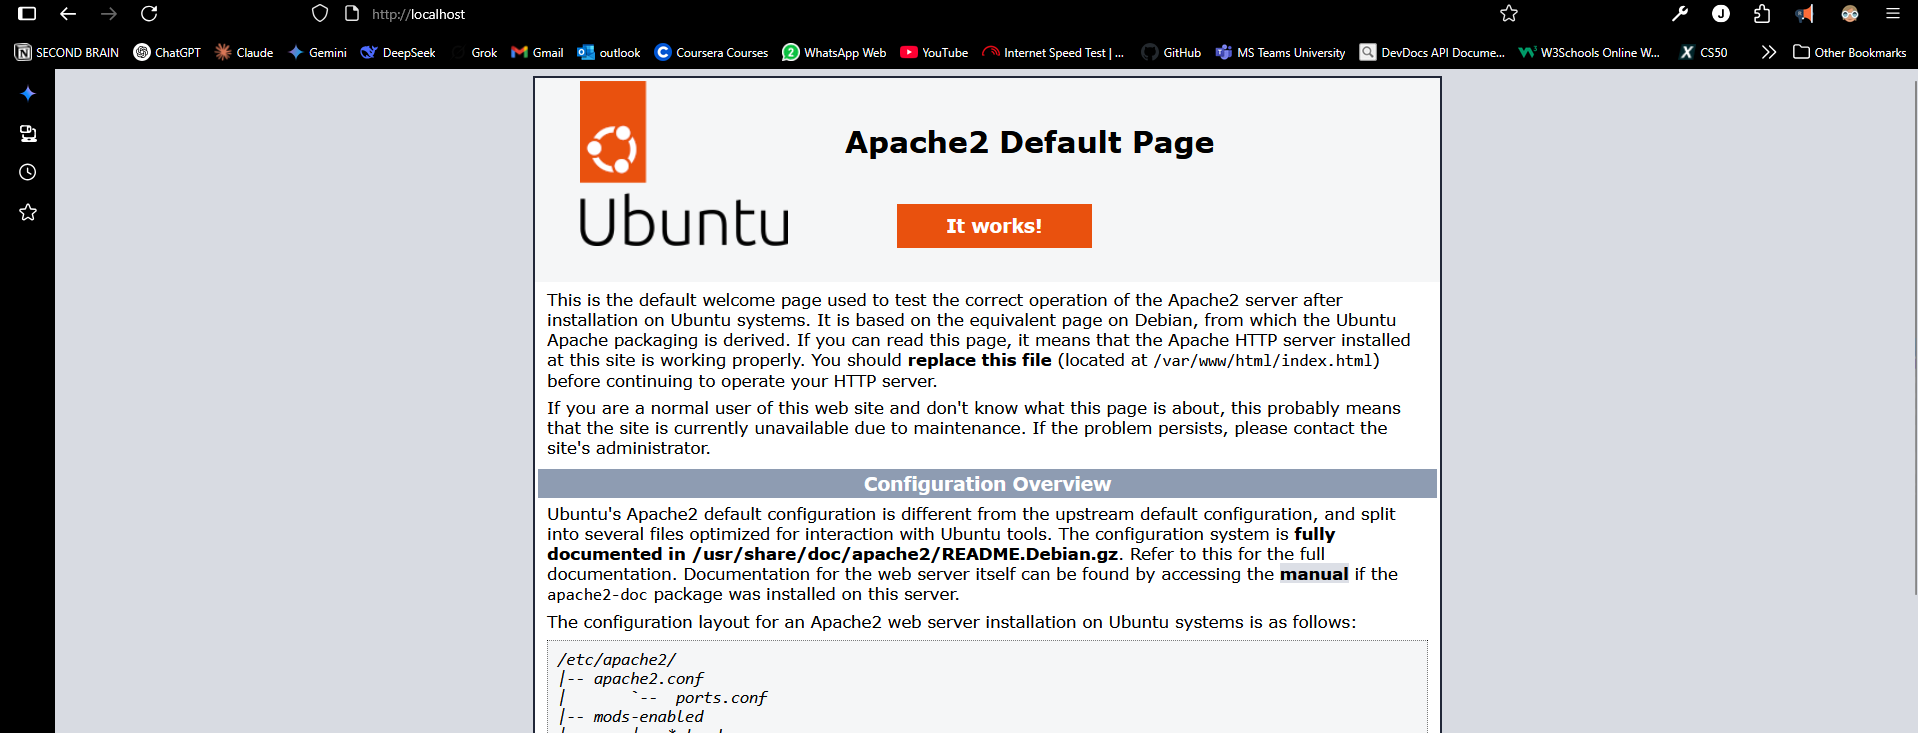
**5. ansible script to run a docker image (nginx)**

---

```yml
- name: Deploy Docker container
  hosts: localhost
  become: yes
  tasks:
    - name: Install Docker
      apt:
        name: docker.io
        state: present
    - name: Ensure Docker is running
      service:
        name: docker
        state: started
        enabled: yes
    - name: Pull Nginx image
      docker_image:
        name: nginx
        source: pull
    - name: Run Nginx container
      docker_container:
        name: my_nginx
        image: nginx
        state: started
        ports:
          - "80:80"

```


---

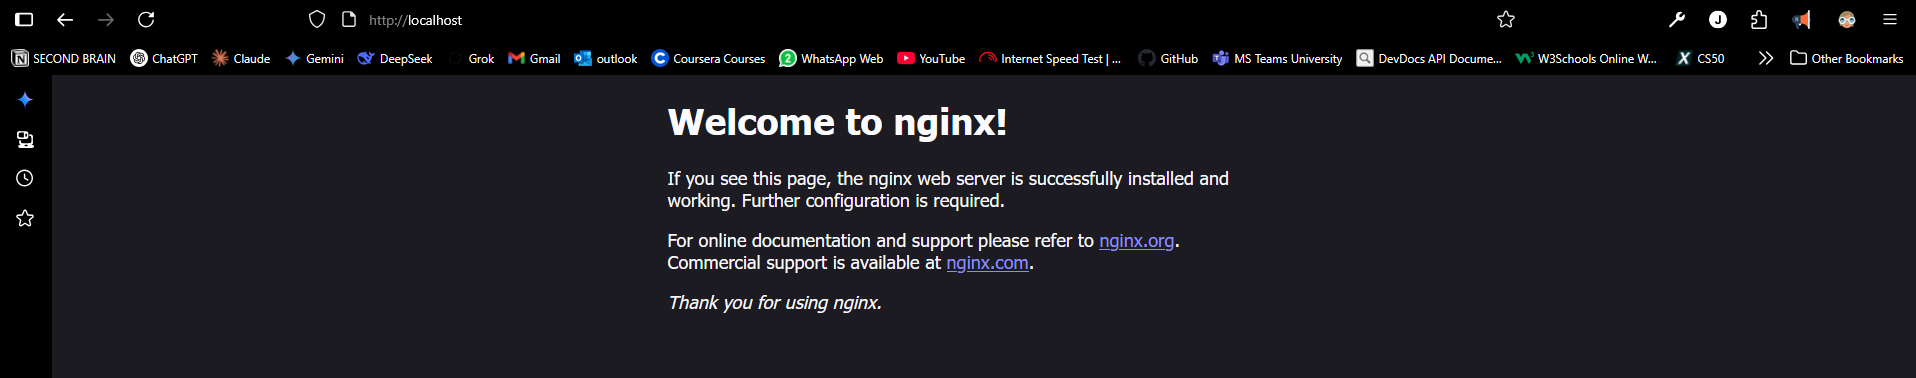

**6. documentation**

---

# Comparison of Ansible, Puppet, Chef, and Terraform

## Ansible
Imagine Ansible as your trusty, no-fuss assistant who gets things done without needing a constant babysitter. It’s a configuration management and application deployment tool that uses simple YAML playbooks to define tasks. What sets it apart is its agentless nature— it relies on SSH to connect to your servers, meaning no extra software needs to be installed on the target machines. This makes it lightweight and quick to set up, perfect for someone like you who’s just starting out. Ansible operates on a push-based model, where you send instructions from a control node to your servers. It’s ideal for orchestrating multi-tier deployments or managing a small-to-medium setup with ease. The learning curve is gentle, and its community is super active, offering tons of pre-built roles to speed things up.

## Puppet
Now, picture Puppet as a more structured, corporate-style manager who likes to keep everything in check with a client-server setup. It’s primarily a configuration management tool, using its own declarative language (Puppet DSL, built on Ruby) to define the desired state of your systems. Unlike Ansible, Puppet is agent-based, requiring a Puppet agent on each managed node that pulls configurations from a central Puppet master. This pull-based approach suits large-scale environments where consistency across hundreds of servers is key. It’s great for enforcing policies and managing complex infrastructures, though it might feel a bit heavyweight if you’re just tinkering locally. The trade-off is a steeper learning curve, but once mastered, it’s a powerhouse for enterprise-grade automation.

## Chef
Chef feels like a chef in a high-end kitchen—creative, precise, and a bit hands-on. It’s another configuration management tool, leaning heavily on Ruby for writing recipes that describe how systems should be configured. Like Puppet, it uses an agent-based, client-server model where nodes pull their configurations from a Chef server. This allows for highly customizable and detailed automation, making it a favorite for environments where you need fine-grained control over every ingredient (or server setting). It’s particularly strong in dynamic, cloud-based setups, but it requires more coding expertise than Ansible, and the initial setup can be time-consuming. If you love scripting and want a tool that grows with your skills, Chef might be your pick.

## Terraform
Finally, Terraform is like an architect designing the blueprint for your infrastructure. It’s an Infrastructure as Code (IaC) tool that uses a declarative language called HCL (HashiCorp Configuration Language) to provision and manage cloud resources—think EC2 instances, VPCs, or storage. Unlike the others, Terraform focuses on the "what" rather than the "how," letting you define your desired infrastructure state, and it handles the rest. It’s not about ongoing configuration management but about setting up the foundation, making it perfect for launching resources on AWS, Azure, or GCP. Since you hit a payment snag with AWS, Terraform’s simulation mode (via `terraform plan`) let you practice without spending a dime. It’s a bit different from the others, shining in multi-cloud scenarios, though it requires careful state management to avoid conflicts.

## Key Differences
- **Type**: Ansible, Puppet, and Chef handle configuration management and ongoing maintenance, while Terraform is all about provisioning infrastructure.
- **Language**: Ansible uses YAML, Puppet uses its DSL, Chef uses Ruby, and Terraform uses HCL.
- **Approach**: Ansible is agentless and push-based; Puppet and Chef are agent-based and pull-based; Terraform is declarative and state-driven.
- **Use Case**: Ansible for quick, simple setups; Puppet and Chef for large, complex management; Terraform for initial resource creation across clouds.

Each tool has its personality—Ansible for the DIY enthusiast, Puppet and Chef for the enterprise pro, and Terraform for the cloud architect. Depending on your project, you might even mix them, but understanding their strengths will guide your choice as you grow in this space!